# NewsQA

## 1. Import Dataset and Pre-processing

In [5]:
import pandas as pd
import json
from pandas import json_normalize

In [9]:
# load JSON document into python
with open('Dataset/archive/combined-newsqa-data-v1.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [89]:
# create Dataframe by normalizing JSON file and give only needed fields
FIELDS = ["text", "q", "consensus.s", "consensus.e", "isAnswerAbsent", "isQuestionBad"]
df = pd.json_normalize(data["data"], record_path=["questions"], meta=["text"])
dataset = df[FIELDS]

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119633 entries, 0 to 119632
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   text            119633 non-null  object 
 1   q               119633 non-null  object 
 2   consensus.s     85193 non-null   float64
 3   consensus.e     85193 non-null   float64
 4   isAnswerAbsent  119633 non-null  float64
 5   isQuestionBad   107861 non-null  float64
dtypes: float64(4), object(2)
memory usage: 5.5+ MB


C:\Users\Max\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


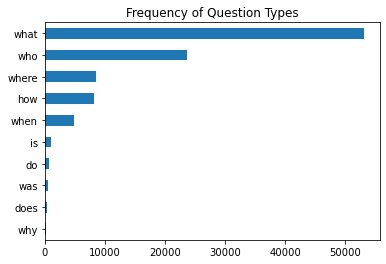

In [87]:
# examine the dataset, frequency of question types
from matplotlib import pyplot as plt

counts = {}
question_types = ["what", "how", "is", "does", "do", "was", "where", "why", "when", "who"]
dataset["q"] = dataset["q"].str.lower()

for q in question_types:
    counts[q] = dataset["q"].str.startswith(q).value_counts()[True]
    
pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")
plt.show()

In [105]:
# examine how many questions are seen as bad
dataset["isQuestionBad"].value_counts()

0.000000    87810
0.333333     7013
1.000000     6646
0.500000     3494
0.666667     1802
0.250000      743
0.200000      175
0.750000       76
0.400000       48
0.166667       24
0.600000       19
0.800000        7
0.142857        1
0.833333        1
0.181818        1
0.125000        1
Name: isQuestionBad, dtype: int64

In [162]:
# look at some examples of bad questions
list[dataset[dataset["isQuestionBad"]>0.5].sample(n=10, random_state=3)["q"]]

ValueError: a must be greater than 0 unless no samples are taken

In [123]:
# clean dataset of bad questions
dataset = dataset[dataset["isQuestionBad"]==0.0]
dataset.info()

In [150]:
# add 2 columns for question and text length
dataset["q_length"] = dataset["q"].apply(lambda x: len(str(x).split()))
dataset["text_length"] = dataset["text"].apply(lambda x: len(str(x).split()))

In [151]:
dataset

,text,q,consensus.s,consensus.e,isAnswerAbsent,isQuestionBad,q_length,text_length
0,"NEW DELHI, India (CNN) -- A high court in nort...",What was the amount of children murdered?,294.0,297.0,0.000000,0.0,7,212
1,"NEW DELHI, India (CNN) -- A high court in nort...",When was Pandher sentenced to death?,261.0,271.0,0.000000,0.0,6,212
2,"NEW DELHI, India (CNN) -- A high court in nort...",The court aquitted Moninder Singh Pandher of w...,624.0,640.0,0.000000,0.0,9,212
3,"NEW DELHI, India (CNN) -- A high court in nort...",who was acquitted,195.0,218.0,0.000000,0.0,3,212
4,"NEW DELHI, India (CNN) -- A high court in nort...",who was sentenced,195.0,218.0,0.333333,0.0,3,212
...,...,...,...,...,...,...,...,...
119627,"(CNN) -- The commissioner of the Cambridge, Ma...",What happened to the professor?,751.0,897.0,0.000000,0.0,5,865
119628,"(CNN) -- The commissioner of the Cambridge, Ma...",Who did Sgt. James Crowley do CPR on?,NaN,NaN,0.500000,0.0,8,865
119629,"(CNN) -- The commissioner of the Cambridge, Ma...",What did Crowley say?,NaN,NaN,0.000000,0.0,4,865
119631,WASHINGTON (CNN) -- An Ohio death row inmate w...,what did cooey say,54.0,90.0,0.000000,0.0,4,727


In [134]:
pip install cufflinks --upgrade

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=b32bae4ed4db88ff607ba96e190ab91fd37c5e9caddd1b42023bf1598d0e9828
  Stored in directory: c:\users\max\appdata\local\pip\cache\wheels\1c\db\ce\70cf35eb5a61b9ea3d34434072a8821dddc4f21eb5127e5415
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [135]:
# imports to use iplot on Dataframe.Series
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [152]:
# plot the question length and see potential outliars
dataset['q_length'].iplot(
    kind='hist',
    bins=100,
    xTitle='Question length',
    linecolor='black',
    yTitle='count',
    title='Question Text Length Distribution')

In [155]:
# plot text length after dropping the duplicates from dataframe
dataset_text = dataset.drop_duplicates(subset=["text"])

dataset_text['text_length'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Text Word Count Distribution')

In [161]:
# examine very long questions
list(dataset[dataset["q_length"]>30]["q"])

['Who disappeared?',
 'Which military?',
 'Which preseciptions?',
 'Which magazine?',
 'Which Videographer?',
 'Delivered where?',
 'who testified?',
 'What condition?',
 'Who disappeared?',
 'who disappeared',
 'What transpired?',
 'What charities?',
 'Who disappeared?',
 'Who disappeared?',
 'Who preformed?',
 'Who over-promised?',
 'What continued?',
 'What improved?',
 'What pollutants?',
 'Who disappeared?',
 'who apologized',
 'who surrendered?',
 'what exploded?',
 'What collapsed?',
 'What collided?',
 'Who struggles?',
 'Who disappeared?',
 'what initiative?',
 'Who recovered?',
 'What exploded?',
 'what exploded?',
 'what collapses',
 'What snowboarder?',
 'Who apologized?',
 'What collapsed?',
 'Who testified?',
 'what reopened?',
 'Who disappeared?',
 'Who apologised?',
 'Protest locations?',
 'Who disappeared?',
 'what collapsed?',
 'where travelers?',
 'Who apologizes?',
 "Who's expanding?",
 'what collided?',
 'What malfunctions?']

In [159]:
# delete those long questions as they bring no value
dataset = dataset[dataset["q_length"]<30]

In [160]:
# plot question length again
dataset['q_length'].iplot(
    kind='hist',
    bins=100,
    xTitle='Question length',
    linecolor='black',
    yTitle='count',
    title='Question Text Length Distribution')

## 2. Use model from HuggingFace and tokenize the Data

In [11]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [15]:
tf.version.VERSION

NameError: name 'tf' is not defined

In [13]:
from transformers import AutoModelForQuestionAnswering,  AutoTokenizer, pipeline

ImportError: cannot import name 'AutoModelForQuestionAnswering'

In [7]:
model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/477 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/107 [00:00<?, ?B/s]

In [12]:
from transformers import pipeline
from transformers import AutoModelForQuestionAnswering

ImportError: cannot import name 'AutoModelForQuestionAnswering'

In [ ]:
pipe = pipeline("question-asnwering", model=model, tokenizer=tokenizer)

## 3. Check for number of tokens in QA-pairs. More than model allows? Implement a sliding window